### Imports

In [1]:
from tensorflow.python.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import numpy as np

import os

import pandas as pd

import random

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

### Load Datasets

In [0]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

### Form Train and Test Datasets

In [0]:
trainX=train.iloc[:, 1:]
trainY=train['label']

In [0]:
testX=test.iloc[:, 1:]
testY=test['label']

In [0]:
trainX, validationX, trainY, validationY = train_test_split(trainX, trainY, test_size=0.1, random_state=13)

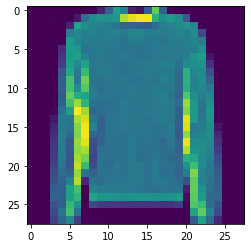

In [0]:
plt.imshow(trainX[0])

## Preprocess Train and Test Dataset 
(to result in a format that can be sent in the CNN)

In [0]:
def reshape_image (data, size):
  data=np.array(data)
  data=data.reshape(size, 28, 28,1)
  return data

In [0]:
# trainX=reshape_image(trainX, trainX.shape[0])
testX=reshape_image(testX, testX.shape[0])
# validationX=reshape_image(validationX, validationX.shape[0])

In [0]:
def preprocessY (lst):
  integer_encoded = label_encoder.fit_transform(np.array(lst))
  trainY=to_categorical(integer_encoded)
  return trainY

In [0]:
# trainY=preprocessY(trainY)
testY=preprocessY(testY)
# validationY=preprocessY(validationY)

## Model Architecture

In [0]:
input_shape=(28, 28, 1)
batch_size =128

In [0]:
#Define Model
model=Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

### Generator Function

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08) 

### Train the Model

In [0]:
checkpoint_path = "/content/drive/My Drive/fashionmnist/Checkpoints"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [0]:
history=model.fit_generator(gen.flow(trainX, trainY, batch_size), 
                    steps_per_epoch=trainY.shape[0]//batch_size, 
                    epochs=10, 
                    validation_data=gen.flow(validationX, validationY, batch_size),
                    validation_steps=validationY.shape[0]//batch_size,
                    callbacks=[cp_callback]
                    )

### Save the Model

In [0]:
model.save("/Checkpoint/model.h5")

### Load the Model

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model = load_model("Checkpoints/model.h5")

### Training and Validation Accuracy

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
his=history

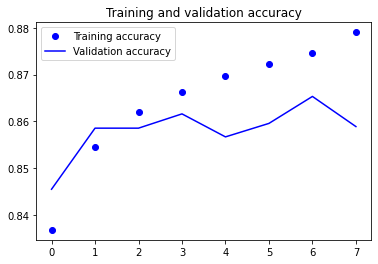

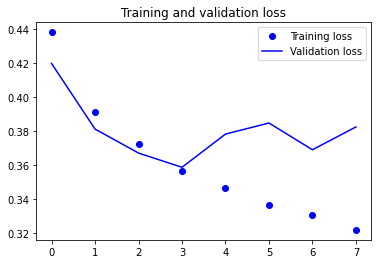

In [0]:
accuracy = his.history['accuracy']
val_accuracy = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Test Analysis

In [19]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28063836693763733
Test accuracy: 0.9021000266075134


In [0]:
prediction=model.predict(testX)

In [0]:
pred_labels = np.argmax(prediction, axis=-1)    

In [0]:
test_labels= np.argmax(testY, axis=-1)  

### Precision/Recall

In [25]:
#Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.84      0.85      1000
           3       0.94      0.90      0.92      1000
           4       0.86      0.83      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.69      0.70      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Confusion Matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


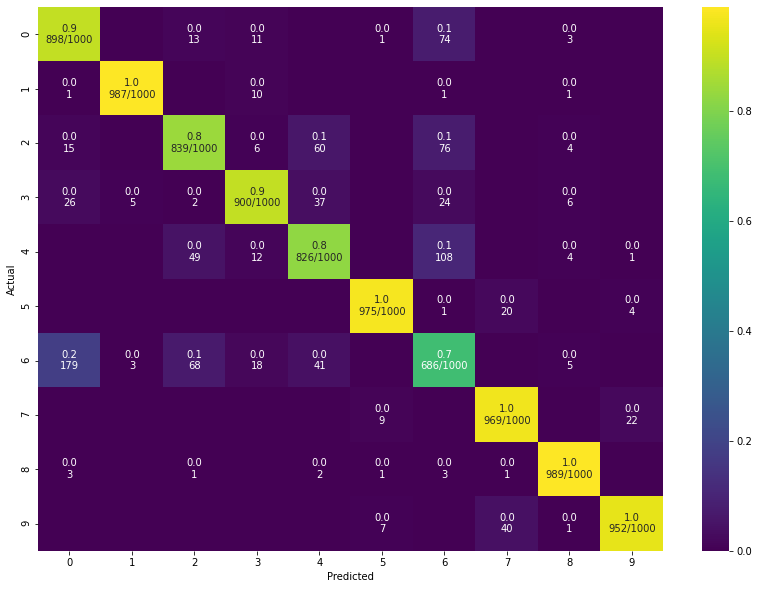

In [26]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(14,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) 
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f\n%d' % (p, c)
    cm = pd.DataFrame(cm_perc, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='viridis')
    
plot_cm(test_labels, pred_labels)